# NBA Archetypes

In this project, we aim to explore the evolving landscape of the NBA by identifying distinct player archetypes based on performance data from the 2023-2024 regular season. Traditional player positions—Point Guard, Shooting Guard, Small Forward, Power Forward, and Center—have become less rigid as the game has evolved, with changes in play style, strategy, and individual skillsets. To begin, we will perform data preprocessing to clean and prepare the dataset, followed by exploratory data analysis (EDA) to better understand the patterns and relationships within the data. Using advanced data analysis techniques such as Principal Component Analysis (PCA) to reduce the dimensionality and K-Means clustering to group similar players, we will define archetypes that reflect the modern roles players occupy on the court. This analysis will provide valuable insights into the variety of player types in today’s NBA, moving beyond traditional positions to a more nuanced understanding of player roles and their impact on team performance.

## Initialization

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Machine learning and data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Load Data

In [2]:
# Load data function
def load_data(file_name, local_path, server_path, encoding='utf-8', sep=','):
    try:
        data = pd.read_csv(local_path + file_name, encoding=encoding, sep=';')
        print(f"'{file_name}' file successfully read from the local path.")

    except (FileNotFoundError, UnicodeDecodeError):
        try:
            data = pd.read_csv(server_path + file_name, encoding=encoding, sep=';')
            print(f"'{file_name}' file successfully read from the server path.")

        except FileNotFoundError:
            print(f"'{file_name}' file not found. Please check the file paths.")
            data = None

        except UnicodeDecodeError:
            print(f"Encoding error encountered while reading '{file_name}' from the server path.")
            data = None
            
    return data

file_name = '2023-2024 NBA Player Stats - Regular.csv'
local_path =  '/Users/benjaminstephen/Documents/TripleTen/Code_Pudding/NBA-Archetypes/datasets/'
server_path = '/datasets/'

df = load_data(file_name, local_path, server_path, encoding='ISO-8859-1', sep=';')

'2023-2024 NBA Player Stats - Regular.csv' file successfully read from the local path.


## Data Preprocessing

In [3]:
# Analyze function
def analyze(data):
    # Display the DataFrame
    display(data)

    # Print DataFrame Info
    print("DATAFRAME INFO:")
    data.info()
    print()

    # Calculate Percentage of Null Values
    print("PERCENTAGE OF NULL VALUES:")
    print((data.isnull().sum()/len(data)) * 100)
    print()

    # Calculate Number of Duplicated Rows
    print("NUMBER OF DUPLICATED ROWS:", data.duplicated().sum())

In [4]:
analyze(df)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,...,0.616,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6
1,1,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,...,0.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7
2,1,Precious Achiuwa,PF,24,NYK,49,18,24.2,3.2,6.1,...,0.643,2.9,4.3,7.2,1.1,0.6,1.1,1.1,2.1,7.6
3,2,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,...,0.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3
4,3,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,...,0.661,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,568,Thaddeus Young,PF,35,PHO,10,0,8.9,1.1,2.1,...,0.333,1.7,1.1,2.8,0.7,0.5,0.2,0.4,1.1,2.3
731,569,Trae Young,PG,25,ATL,54,54,36.0,8.0,18.7,...,0.855,0.4,2.3,2.8,10.8,1.3,0.2,4.4,2.0,25.7
732,570,Omer Yurtseven,C,25,UTA,48,12,11.4,2.1,3.8,...,0.679,1.5,2.8,4.3,0.6,0.2,0.4,0.8,1.1,4.6
733,571,Cody Zeller,C,31,NOP,43,0,7.4,0.6,1.4,...,0.605,1.1,1.5,2.6,0.9,0.2,0.1,0.4,1.0,1.8


DATAFRAME INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      735 non-null    int64  
 1   Player  735 non-null    object 
 2   Pos     735 non-null    object 
 3   Age     735 non-null    int64  
 4   Tm      735 non-null    object 
 5   G       735 non-null    int64  
 6   GS      735 non-null    int64  
 7   MP      735 non-null    float64
 8   FG      735 non-null    float64
 9   FGA     735 non-null    float64
 10  FG%     735 non-null    float64
 11  3P      735 non-null    float64
 12  3PA     735 non-null    float64
 13  3P%     735 non-null    float64
 14  2P      735 non-null    float64
 15  2PA     735 non-null    float64
 16  2P%     735 non-null    float64
 17  eFG%    735 non-null    float64
 18  FT      735 non-null    float64
 19  FTA     735 non-null    float64
 20  FT%     735 non-null    float64
 21  ORB     735 non-null   

The dataset contains information on 735 NBA players, with 30 columns capturing various performance metrics, demographic details, and identifiers. It includes 23 numeric columns (float64), 4 integer columns (int64), and 3 categorical columns (object). Importantly, the dataset is complete with no missing or null values, and there are no duplicate rows, ensuring each entry represents a unique player.

The features cover a wide array of statistics, such as shooting metrics (e.g., FG, 3P, 2P, FT), rebounds (ORB, DRB, TRB), and other game stats like assists (AST), steals (STL), blocks (BLK), turnovers (TOV), and personal fouls (PF). Efficiency-related columns like field goal percentage (FG%) and effective field goal percentage (eFG%) are also present. The dataset includes identifiers like player rank (Rk), name (Player), team (Tm), and position (Pos), along with demographic details such as age (Age).

To begin, we will evaluate the relevance of each column to the analysis, considering whether certain identifiers or metrics contribute meaningfully to player clustering or statistical modeling. We will also assess any columns with high correlation and consider dropping those that may add redundancy or noise to the analysis.

In [5]:
df.drop(columns=['Rk', 'Pos', 'Age', 'Tm', 'GS', 'FG', 'FGA', 'FG%', '3P%', '2P%', 'eFG%', 'TRB', 'FT%', 'TRB'], inplace=True)

### Why are we dropping these columns?

- **Rank ('Rk'):** This is merely a ranking or identifier in the dataset and does not contribute to understanding a player's performance or archetype.

- **Age ('Age'):**  While age may influence a player’s performance or style over time, it does not directly represent their on-court behavior or playing style. Including it may introduce noise unless you're specifically studying age-related patterns.

- **Team ('Tm'):**  While team context may affect individual performance, this feature doesn’t directly represent a player's individual playing style or performance metrics. Dropping it ensures the analysis focuses on intrinsic player characteristics.

- **Games Played ('G')**  This feature reflects availability rather than playing style. Other features such as 'Minutes Per Game' or total points scored already account for a player’s impact on the court.

- **Games Started ('GS'):**  Starting games is more about a coach’s decision and role within a team rather than directly indicating playing style. Metrics like 'Minutes Per Game' capture similar information in a more nuanced way.

- **Field Goals Made ('FG') and Field Goals Attempted ('FGA'):**  These aggregate data across two-point and three-point shots. Analyzing 'Two-Point Field Goals Made' and 'Three-Point Field Goals Made' separately provides more specific insights into playing styles.

- **Field Goal Percentage ('FG%') and Effective Field Goal Percentage ('eFG%'):**  These are aggregate shooting efficiency metrics that are derived from other data such as 'Field Goals Made' and 'Field Goals Attempted'. Including both derived metrics and raw shooting data can lead to redundancy and may skew the clustering results.

- **Three-Point Field Goal Percentage ('3P%') and Two-Point Field Goal Percentage ('2P%'):**  While these provide useful shooting efficiency insights, raw shooting stats like 'Three-Point Field Goals Made' and 'Two-Point Field Goals Made' provide more detailed information about playing style, as they show how frequently players attempt certain shots.

- **Free Throw Percentage ('FT%'):**  Free throw efficiency may not strongly differentiate player archetypes compared to other features like 'Free Throws Made' or total points.

- **Total Rebounds ('TRB'):**  This aggregates offensive and defensive rebounds. By focusing on 'Offensive Rebounds' and 'Defensive Rebounds' separately, you retain more granular data, which could be more informative for clustering.

The features we're retaining—like 'Minutes Per Game', 'Assists', 'Points', and separate shooting stats—provide direct insights into player performance and playing style. Dropping these columns helps reduce redundancy and ensures that the clustering focuses on the most meaningful and granular performance metrics.

### Feature Engineering

Given that the dataset contains no null values or duplicates, it appears clean and ready for analysis. However, upon further inspection, we found that many columns represent averages for each player over the course of a season with each team, rather than total statistics. To address this, we multiplied the relevant columns by the number of games played to obtain total statistics for each player. Subsequently, we dropped the original columns representing averages, as they were no longer needed with the total statistics now available. Additionally, since we already have the total minutes played (calculated as 'Minutes Per Game' multiplied by 'Games Played'), we dropped the 'Games Played' column, as it became redundant with the newly calculated total minutes data.

In [6]:
# List of columns to multiply by 'Games Played'
columns_to_multiply = ['MP', '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'ORB', 'DRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

# Multiply specified columns by 'Games Played' and create new columns
for col in columns_to_multiply:
    df[f'Total {col}'] = df[col] * df['G']

# Drop original columns and 'Games Played'
df.drop(columns=columns_to_multiply + ['G'], inplace=True)

analyze(df)

,Player,Total MP,Total 3P,Total 3PA,Total 2P,Total 2PA,Total FT,Total FTA,Total ORB,Total DRB,Total AST,Total STL,Total BLK,Total TOV,Total PF,Total PTS
0,Precious Achiuwa,1620.6,29.6,96.2,207.2,370.0,66.6,111.0,192.4,296.0,96.2,44.4,66.6,81.4,140.6,562.4
1,Precious Achiuwa,437.5,12.5,47.5,65.0,122.5,25.0,42.5,50.0,85.0,45.0,15.0,12.5,30.0,40.0,192.5
2,Precious Achiuwa,1185.8,14.7,49.0,142.1,249.9,44.1,68.6,142.1,210.7,53.9,29.4,53.9,53.9,102.9,372.4
3,Bam Adebayo,2414.0,14.2,42.6,518.3,972.7,291.1,390.5,156.2,575.1,276.9,78.1,63.9,163.3,156.2,1370.3
4,Ochai Agbaji,1638.0,62.4,210.6,117.0,218.4,39.0,54.6,70.2,140.4,85.8,46.8,46.8,62.4,117.0,452.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,Thaddeus Young,89.0,0.0,1.0,11.0,20.0,1.0,3.0,17.0,11.0,7.0,5.0,2.0,4.0,11.0,23.0
731,Trae Young,1944.0,172.8,469.8,259.2,540.0,345.6,405.0,21.6,124.2,583.2,70.2,10.8,237.6,108.0,1387.8
732,Omer Yurtseven,547.2,4.8,24.0,96.0,158.4,19.2,28.8,72.0,134.4,28.8,9.6,19.2,38.4,52.8,220.8
733,Cody Zeller,318.2,0.0,4.3,25.8,60.2,21.5,38.7,47.3,64.5,38.7,8.6,4.3,17.2,43.0,77.4


DATAFRAME INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Player     735 non-null    object 
 1   Total MP   735 non-null    float64
 2   Total 3P   735 non-null    float64
 3   Total 3PA  735 non-null    float64
 4   Total 2P   735 non-null    float64
 5   Total 2PA  735 non-null    float64
 6   Total FT   735 non-null    float64
 7   Total FTA  735 non-null    float64
 8   Total ORB  735 non-null    float64
 9   Total DRB  735 non-null    float64
 10  Total AST  735 non-null    float64
 11  Total STL  735 non-null    float64
 12  Total BLK  735 non-null    float64
 13  Total TOV  735 non-null    float64
 14  Total PF   735 non-null    float64
 15  Total PTS  735 non-null    float64
dtypes: float64(15), object(1)
memory usage: 92.0+ KB

PERCENTAGE OF NULL VALUES:
Player       0.0
Total MP     0.0
Total 3P     0.0
Total 3PA    0.0
Total 2P 

### Aggregating

We noticed that some players are listed multiple times in the dataset, likely because they played on multiple teams during the season, and their statistics are split by team. We will address this issue later by aggregating the data for players with the same name to consolidate their season-long performance.

In [7]:
# Aggregate data by player and sum the relevant statistics
aggregated_df = df.groupby('Player').agg({
    'Total MP': 'sum',   # Total minutes played
    'Total 3P': 'sum',   # Total three-pointers made
    'Total 3PA': 'sum',  # Total three-point attempts
    'Total 2P': 'sum',   # Total two-pointers made
    'Total 2PA': 'sum',  # Total two-point attempts
    'Total FT': 'sum',   # Total free throws made
    'Total FTA': 'sum',  # Total free throw attempts
    'Total ORB': 'sum',  # Total offensive rebounds
    'Total DRB': 'sum',  # Total defensive rebounds
    'Total AST': 'sum',  # Total assists
    'Total STL': 'sum',  # Total steals
    'Total BLK': 'sum',  # Total blocks
    'Total TOV': 'sum',  # Total turnovers
    'Total PF': 'sum',   # Total personal fouls
    'Total PTS': 'sum'   # Total points made
}).reset_index()

# Verify the aggregated data
analyze(aggregated_df)

# Save the Player Names column and drop it
names = aggregated_df.pop('Player')

,Player,Total MP,Total 3P,Total 3PA,Total 2P,Total 2PA,Total FT,Total FTA,Total ORB,Total DRB,Total AST,Total STL,Total BLK,Total TOV,Total PF,Total PTS
0,A.J. Green,616.0,67.2,168.0,16.8,28.0,16.8,16.8,11.2,56.0,28.0,11.2,5.6,11.2,50.4,252.0
1,A.J. Lawson,310.8,12.6,50.4,42.0,71.4,16.8,21.0,12.6,37.8,21.0,8.4,4.2,12.6,21.0,134.4
2,AJ Griffin,172.0,10.0,40.0,8.0,24.0,2.0,2.0,2.0,16.0,6.0,2.0,2.0,8.0,6.0,48.0
3,Aaron Gordon,2299.5,36.5,138.7,357.7,576.7,175.2,270.1,175.2,299.3,255.5,58.4,43.8,102.2,138.7,1014.7
4,Aaron Holiday,1271.4,85.8,218.4,101.4,202.8,54.6,62.4,23.4,101.4,140.4,39.0,7.8,54.6,124.8,514.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,Zach LaVine,872.5,60.0,170.0,110.0,207.5,87.5,102.5,7.5,120.0,97.5,20.0,7.5,52.5,57.5,487.5
568,Zavier Simpson,161.0,4.9,16.8,11.9,37.1,2.8,4.2,4.2,16.1,25.2,7.0,2.8,9.8,11.2,42.0
569,Zeke Nnaji,574.2,5.8,23.2,63.8,127.6,40.6,63.8,63.8,63.8,34.8,17.4,40.6,29.0,81.2,185.6
570,Ziaire Williams,1040.4,56.1,188.7,91.8,188.7,61.2,76.5,35.7,142.8,76.5,35.7,10.2,66.3,86.7,418.2


DATAFRAME INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Player     572 non-null    object 
 1   Total MP   572 non-null    float64
 2   Total 3P   572 non-null    float64
 3   Total 3PA  572 non-null    float64
 4   Total 2P   572 non-null    float64
 5   Total 2PA  572 non-null    float64
 6   Total FT   572 non-null    float64
 7   Total FTA  572 non-null    float64
 8   Total ORB  572 non-null    float64
 9   Total DRB  572 non-null    float64
 10  Total AST  572 non-null    float64
 11  Total STL  572 non-null    float64
 12  Total BLK  572 non-null    float64
 13  Total TOV  572 non-null    float64
 14  Total PF   572 non-null    float64
 15  Total PTS  572 non-null    float64
dtypes: float64(15), object(1)
memory usage: 71.6+ KB

PERCENTAGE OF NULL VALUES:
Player       0.0
Total MP     0.0
Total 3P     0.0
Total 3PA    0.0
Total 2P 

## Exploratory Data Analysis

### Frequency Distributions

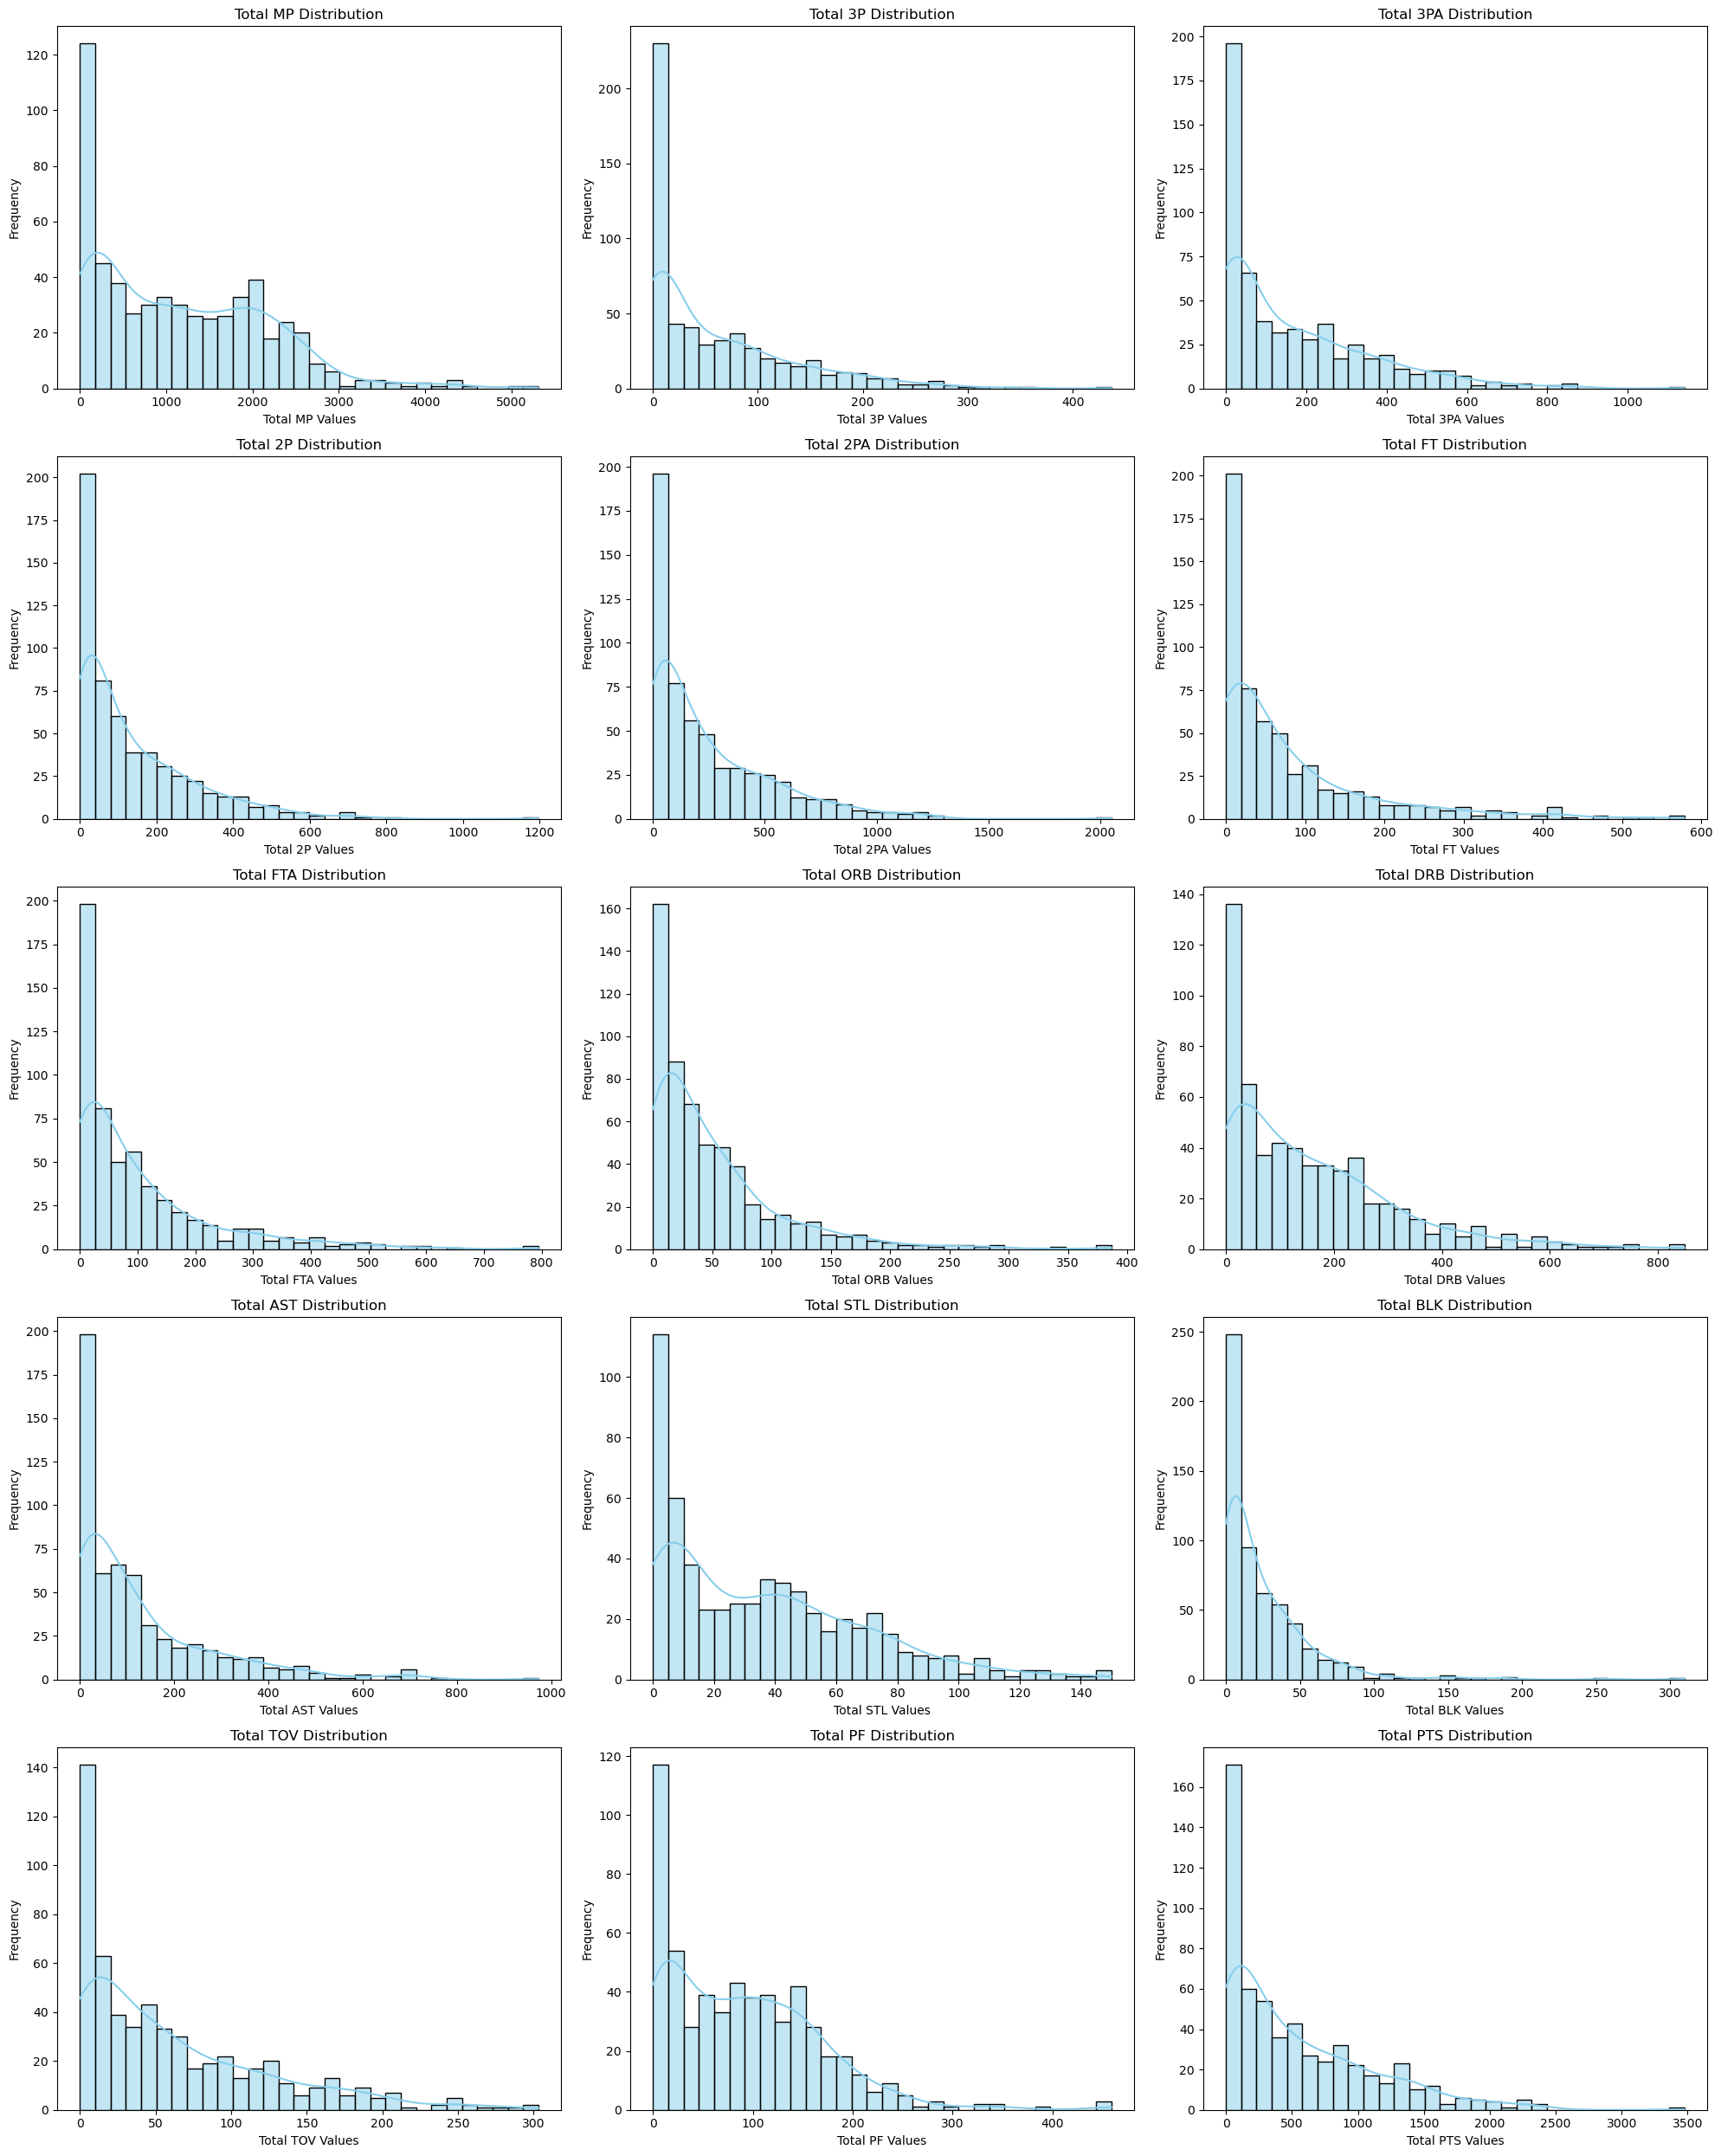

In [8]:
# Set up the number of rows and columns for the grid
num_columns = 3
num_rows = (len(aggregated_df.columns) + num_columns - 1) // num_columns

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, 25)) 
axes = axes.flatten()

# Loop through each column and plot on a subplot
for i, col in enumerate(aggregated_df.columns):
    ax = axes[i]
    sns.histplot(aggregated_df[col], bins=30, ax=ax, color='skyblue', edgecolor='black', kde=True)
    ax.set_title(f'{col} Distribution')
    ax.set_xlabel(f'{col} Values')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

As we can see from the frequency distributions above, most of the statistics show the highest frequency at the lowest values, with a downward trend as the values increase. This pattern indicates that the majority of players accumulate relatively low totals for most statistical categories, while only a smaller subset of players achieve exceptionally high totals.

This distribution aligns with the natural dynamics of basketball, where a limited number of players take on prominent roles, such as primary scorers, playmakers, or rebounders, and therefore produce higher totals in these areas. Conversely, role players, who focus on specific contributions like defense, spacing, or facilitating, tend to have more modest statistical outputs.

The steep decline in frequency as values increase highlights the disparity between average players and those at the top of the league. For example, statistics like total points, assists, or rebounds are often dominated by star players or specialists, while the majority of the league's players fall closer to the lower end of the spectrum. This type of distribution suggests a highly skewed dataset, emphasizing the importance of scaling the data and addressing outliers during the analysis. Additionally, it highlights the diversity of player roles and the varying degrees of statistical contribution within the league, which is central to identifying meaningful player archetypes.

### Heat Map

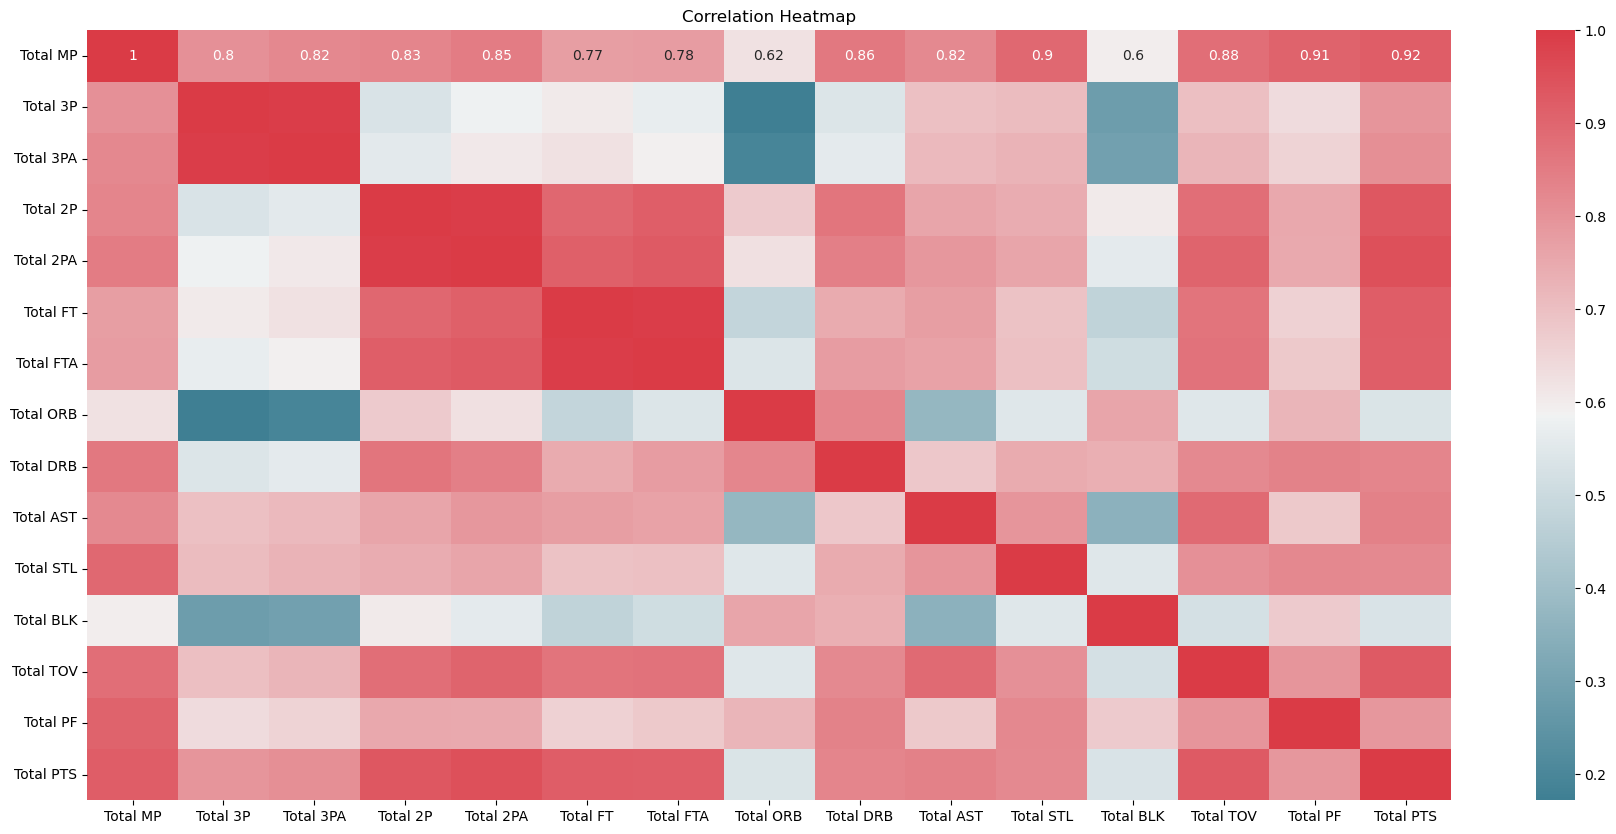

In [9]:
# Compute the correlation matrix
corr = aggregated_df.corr()

# Set up the figure size and plot the heatmap
plt.figure(figsize=(22, 10))
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True)
plt.title(label='Correlation Heatmap')
plt.show()

As observed in the correlation heatmap above, despite our efforts to reduce multicollinearity by removing highly correlated features, there are still significant correlations present between many features. This is particularly evident with 'Total Minutes Played,' which shows a strong positive correlation with nearly every other feature in the dataset. This makes sense because players who play more minutes tend to have higher total statistics across all categories—such as points, rebounds, assists, and even turnovers—since they have more opportunities to contribute on the court.

In addition, 'Total Points' also exhibits strong correlations with other features, particularly with metrics like 'Total Field Goals Attempted,' 'Total Free Throws Made,' and 'Total Offensive Rebounds,' as these contribute directly to scoring opportunities. Similarly, 'Total Turnovers' is closely linked to 'Total Minutes Played' and offensive stats, reflecting that players who handle the ball frequently or play extended minutes are more likely to commit turnovers.

These high correlations can pose challenges during the clustering process, as features that are highly interdependent may dominate the analysis and obscure nuanced differences between player archetypes. While dimensionality reduction techniques like PCA help mitigate these effects, it is important to recognize that these correlations reflect the intrinsic nature of basketball, where many statistics are interrelated due to the dynamics of the game. Balancing the impact of these correlated features while maintaining their meaningful contribution to the analysis is crucial for accurately identifying player archetypes.

### Correlation Between Scoring Methods

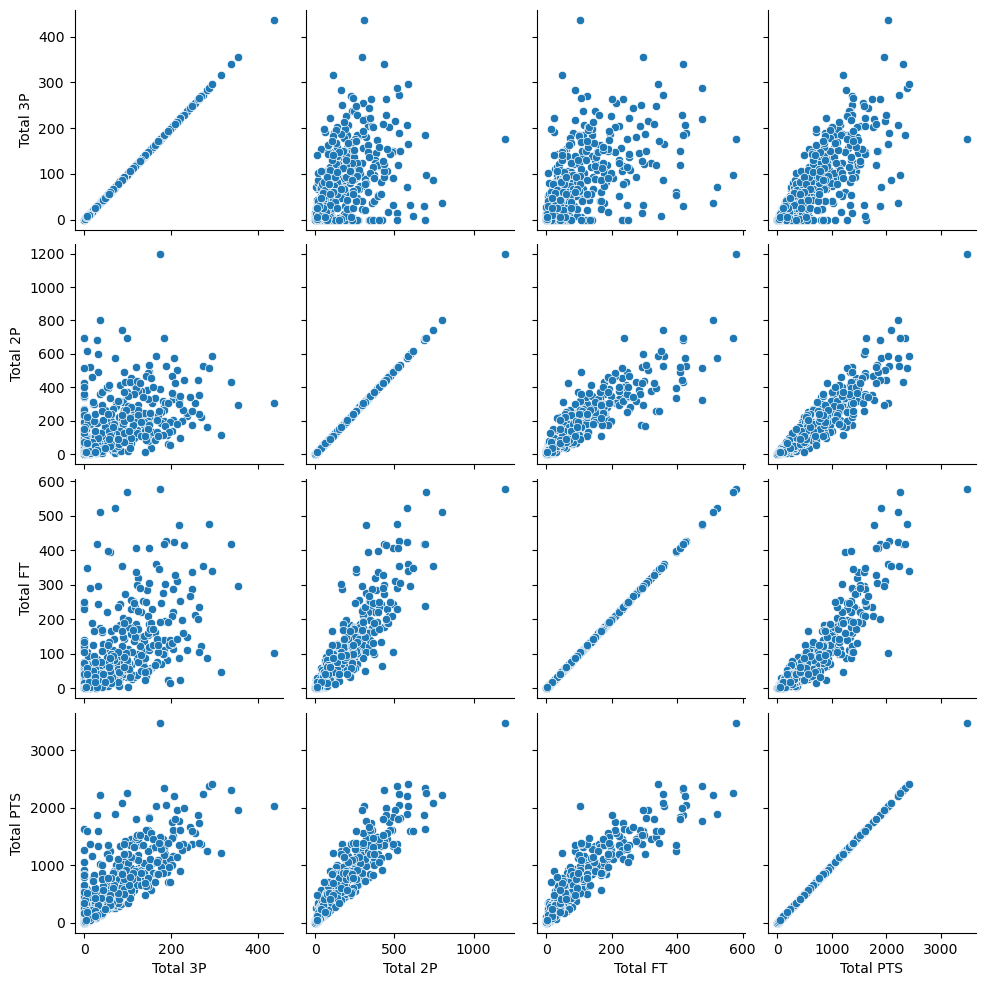

In [10]:
# Create a matrix of scatter plots
sns.pairplot(
    aggregated_df[['Total 3P', 'Total 2P', 'Total FT', 'Total PTS']],
    diag_kind=None,  # Disable diagonal plots
)
plt.show()

The scatterplot matrix reveals strong positive correlations between the following pairs of features:

1) **Total Points (Total PTS) and Free Throws (Total FT):**
Players who score a higher number of total points also tend to excel at scoring free throws. This is likely because players who frequently score points are also more likely to draw fouls, leading to more free throw opportunities.

2) **Total Points (Total PTS) and Two-Point Shots (Total 2P):**
Two-point shots make up a significant portion of the scoring for many players, so it's expected that players with high total points also have high total two-point shot counts. This strong correlation highlights the importance of two-point scoring in overall point production.

3) **Total Two-Point Shots (Total 2P) and Free Throws (Total FT):**
Players who excel at scoring two-point shots may also frequently draw contact in the paint or while driving to the basket, leading to more free throw opportunities. This suggests that certain play styles, such as driving to the hoop or operating in the post, contribute to both metrics.

### Scaling Features

Now we will scale the features. Many of these features, such as "Total MP," "Total PTS," and "Total FTA," have significantly different numerical ranges. For example, "Total Points" can vary greatly between players depending on their role and playing time, while "Total Blocks" or "Total Steals" are likely to be much smaller in comparison. If not scaled, features like "Total PTS" will dominate the distance metric during clustering, overshadowing the influence of other important features like "Total Assists" or "Total Rebounds." This could lead to biased clusters that don’t accurately reflect the players' true on-court roles or playing styles.

Scaling these features ensures that each one contributes equally to the clustering process, regardless of its numerical range. By normalizing the features to a similar scale, you allow the K-Means algorithm to treat each feature fairly, preventing any one feature from disproportionately influencing the clustering results. This leads to more meaningful and balanced clusters that better represent the diverse playing styles and performance metrics of the players.

In [11]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the DataFrame
scaled_df = pd.DataFrame(scaler.fit_transform(aggregated_df), columns=aggregated_df.columns)
analyze(scaled_df)

,Total MP,Total 3P,Total 3PA,Total 2P,Total 2PA,Total FT,Total FTA,Total ORB,Total DRB,Total AST,Total STL,Total BLK,Total TOV,Total PF,Total PTS
0,-0.554855,0.076125,-0.007325,-0.775245,-0.803415,-0.618488,-0.671515,-0.685140,-0.653519,-0.661636,-0.765176,-0.589367,-0.800160,-0.524546,-0.519997
1,-0.862516,-0.680863,-0.628711,-0.615295,-0.650218,-0.618488,-0.638650,-0.660939,-0.770544,-0.707821,-0.850999,-0.632714,-0.777992,-0.906033,-0.729775
2,-1.002435,-0.716910,-0.683664,-0.831100,-0.817535,-0.762528,-0.787323,-0.844174,-0.910718,-0.806789,-1.047167,-0.700831,-0.850830,-1.100668,-0.883898
3,1.142219,-0.349508,-0.162143,1.388515,1.133435,0.923126,1.310529,2.149818,0.910891,0.839379,0.681560,0.593394,0.640765,0.621211,0.840529
4,0.105829,0.334000,0.258983,-0.238272,-0.186390,-0.250603,-0.314700,-0.474247,-0.361599,0.079965,0.086927,-0.521249,-0.112950,0.440848,-0.051207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,-0.296287,-0.023698,0.003242,-0.183686,-0.169800,0.069594,-0.000922,-0.749099,-0.242002,-0.203084,-0.495445,-0.530538,-0.146202,-0.432418,-0.099905
568,-1.013524,-0.787618,-0.806250,-0.806346,-0.771293,-0.754742,-0.770109,-0.806144,-0.910075,-0.680110,-0.893911,-0.676061,-0.822328,-1.033195,-0.894601
569,-0.596992,-0.775140,-0.772433,-0.476926,-0.451838,-0.386857,-0.303745,0.224121,-0.603365,-0.616770,-0.575138,0.494314,-0.518309,-0.124894,-0.638443
570,-0.127033,-0.077768,0.102051,-0.299205,-0.236162,-0.186369,-0.204369,-0.261625,-0.095398,-0.341639,-0.014222,-0.446940,0.072312,-0.053527,-0.223525


DATAFRAME INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Total MP   572 non-null    float64
 1   Total 3P   572 non-null    float64
 2   Total 3PA  572 non-null    float64
 3   Total 2P   572 non-null    float64
 4   Total 2PA  572 non-null    float64
 5   Total FT   572 non-null    float64
 6   Total FTA  572 non-null    float64
 7   Total ORB  572 non-null    float64
 8   Total DRB  572 non-null    float64
 9   Total AST  572 non-null    float64
 10  Total STL  572 non-null    float64
 11  Total BLK  572 non-null    float64
 12  Total TOV  572 non-null    float64
 13  Total PF   572 non-null    float64
 14  Total PTS  572 non-null    float64
dtypes: float64(15)
memory usage: 67.2 KB

PERCENTAGE OF NULL VALUES:
Total MP     0.0
Total 3P     0.0
Total 3PA    0.0
Total 2P     0.0
Total 2PA    0.0
Total FT     0.0
Total FTA    0.0
Total ORB 

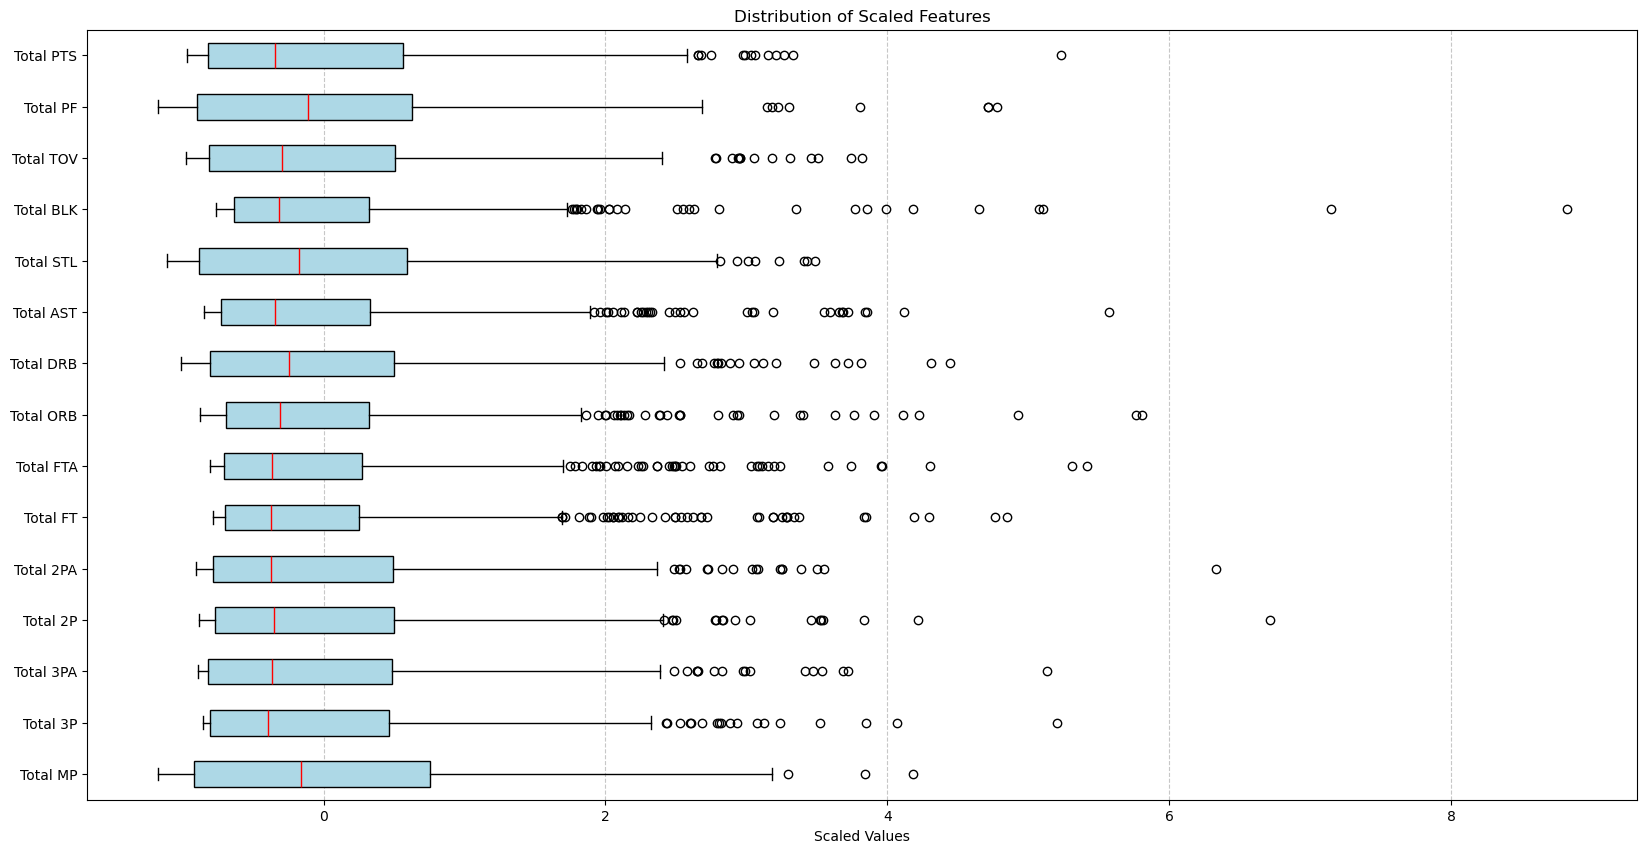

In [12]:
# Create a boxplot to visualize the scaled data
plt.figure(figsize=(20, 10))
plt.boxplot(scaled_df.values, vert=False, patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='black'), 
            medianprops=dict(color='red'))

# Add labels
plt.yticks(range(1, len(scaled_df.columns) + 1), scaled_df.columns)
plt.xlabel('Scaled Values')
plt.title('Distribution of Scaled Features')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

The box plots above, representing all features after scaling, show that the data has been standardized, making it easier to compare across different features. In this standardized data, the median of each feature is centered around 0, with most values falling between -3 and +3. The "whiskers" on the plots capture the spread of the majority of values, while points outside this range are considered outliers—indicating data points that differ significantly from the rest. These box plots offer a clear view of the data distribution, helping to highlight any features with extreme values.

Given that the data includes players with varying playing styles, roles, and situations, outliers are expected. For example, players who score a high number of points or excel in specific areas like rebounding may naturally show up as outliers. These extreme values likely represent important player traits, such as star players or specialists. Since these outliers reflect key aspects of player performance, they provide valuable insights for our analysis, and thus, we have chosen not to remove them.

## Clustering

Clustering is a type of unsupervised machine learning technique used to group similar data points together based on their characteristics. It helps identify patterns or structures in data without requiring labeled outcomes. One popular clustering algorithm is K-Means, which assigns data points to a predefined number of clusters by minimizing the variance within each cluster. In this project, we will apply K-Means clustering to a dataset of NBA player statistics to identify distinct player archetypes based on their playing style and performance metrics.

Before applying K-Means, we will use Principal Component Analysis (PCA) to reduce the number of features in the dataset while retaining the most important information. PCA helps simplify complex datasets by transforming the original features into a smaller set of new features, called principal components, that capture the most significant variations in the data. By using PCA, we can make the clustering process more efficient and effective, as it reduces the dimensionality of the data without losing key patterns. We will then use the reduced dataset to perform K-Means clustering, enabling us to group NBA players into archetypes based on their performance.

### Finding the optimal number of componenets

It is important to determine the optimal number of components to retain. This step is crucial because while reducing the number of features can simplify the data, we also want to ensure that we don't lose too much important information. To find the right balance, we experimented with different numbers of components and looked at how much of the original variance was retained. By calculating the cumulative explained variance, we could see how each additional component contributed to preserving the data's overall structure. The goal was to choose the number of components that retained at least 95% of the information, allowing us to reduce the complexity of the dataset while still keeping the essential patterns intact.

For n_components = 2, explained variance ratio is 0.8561063205864413
For n_components = 3, explained variance ratio is 0.9184511018479794
For n_components = 4, explained variance ratio is 0.9426820610376164
For n_components = 5, explained variance ratio is 0.9594709566531217
For n_components = 6, explained variance ratio is 0.971502649460677
For n_components = 7, explained variance ratio is 0.9808520738231391
For n_components = 8, explained variance ratio is 0.9884919845435228
For n_components = 9, explained variance ratio is 0.9929634304434886
For n_components = 10, explained variance ratio is 0.9970683240885343
For n_components = 11, explained variance ratio is 0.9988781823583631
For n_components = 12, explained variance ratio is 0.9993977512695219
For n_components = 13, explained variance ratio is 0.9997484197526715
For n_components = 14, explained variance ratio is 0.999994407713005


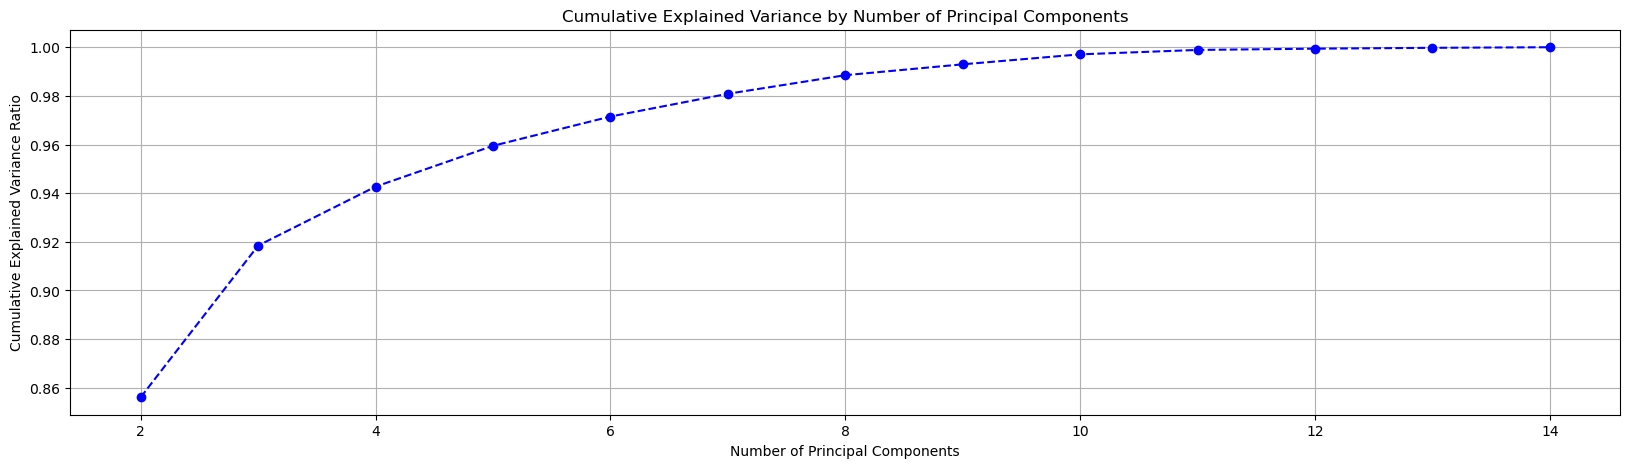

In [13]:
variance_list = []

for n_components in range(2,15):
    pca = PCA(n_components=n_components)
    components = pca.fit_transform(scaled_df)
    variance = sum(pca.explained_variance_ratio_)
    variance_list.append(variance)
    print("For n_components = {}, explained variance ratio is {}".format(n_components, variance))

plt.figure(figsize=(20, 5))
plt.plot(range(2, 15), variance_list, marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

As demonstrated above, reducing the dataset to 5 components allowed us to retain 96% of the original information, exceeding our goal of preserving at least 95%. Therefore, we will proceed with using these 5 components for clustering.

### Finding the optimal number of clusters

Now, we will apply K-Means clustering to the reduced dataset and calculated the silhouette scores for different numbers of clusters (K). The silhouette score measures how similar each point is to its own cluster compared to other clusters. A higher silhouette score indicates better-defined clusters. By analyzing the silhouette scores, we can identify the number of clusters that provide the best balance between distinctiveness and compactness of clusters. We also evaluated the distortion or objective function value, which measures the compactness of the clusters, with lower values indicating more compact clusters. The goal is to find the optimal number of clusters that not only helps in grouping similar NBA player archetypes but also ensures the clusters are meaningful and informative.

For n_clusters = 2, silhouette score is 0.515255
For n_clusters = 3, silhouette score is 0.444374
For n_clusters = 4, silhouette score is 0.406429
For n_clusters = 5, silhouette score is 0.417631
For n_clusters = 6, silhouette score is 0.379660
For n_clusters = 7, silhouette score is 0.382559
For n_clusters = 8, silhouette score is 0.380827
For n_clusters = 9, silhouette score is 0.373751
For n_clusters = 10, silhouette score is 0.333060
For n_clusters = 11, silhouette score is 0.377131
For n_clusters = 12, silhouette score is 0.321408
For n_clusters = 13, silhouette score is 0.380600
For n_clusters = 14, silhouette score is 0.310997
For n_clusters = 15, silhouette score is 0.319287


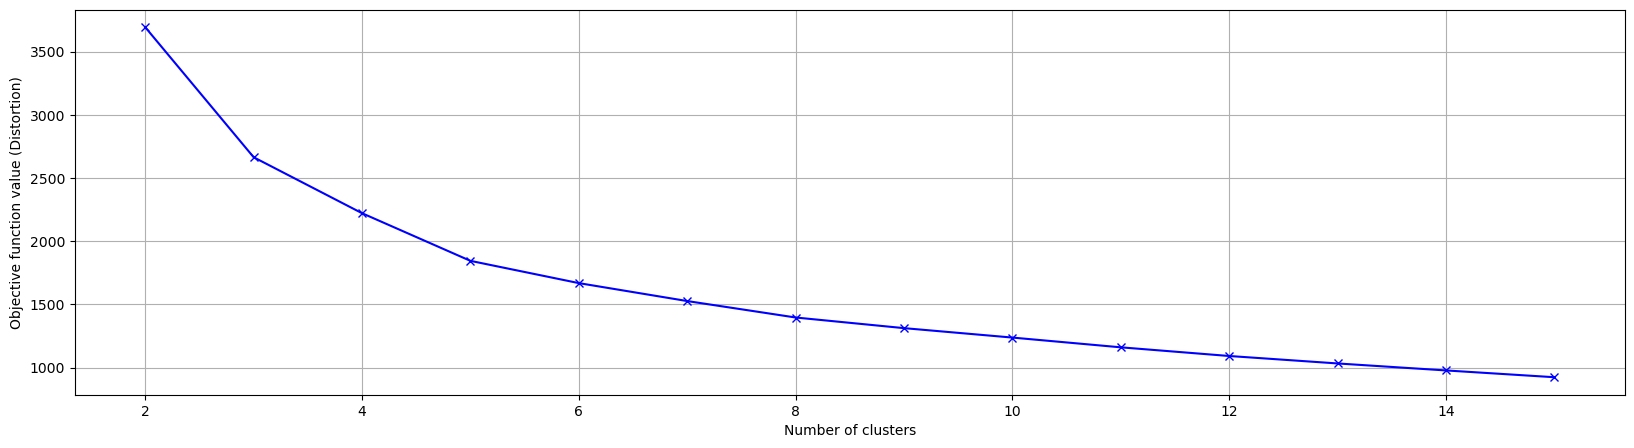

In [14]:
# Perform PCA to reduce data to 5 components
pca = PCA(n_components=5)
reduced_data = pca.fit_transform(scaled_df)

# Initialize lists to store silhouette scores and distortion values
silhouette_scores = []
distortion = []

# Range for the number of clusters (starting from 2)
K = range(2, 16)

# Calculate silhouette score and distortion for each value of K
for k in K:
    model = KMeans(n_clusters=k, random_state=12345)
    model.fit(reduced_data)
    
    # Calculate silhouette score and append to the list
    score = silhouette_score(scaled_df, model.labels_)
    silhouette_scores.append(score)
    
    # Calculate distortion (inertia) and append to the list
    distortion.append(model.inertia_)

    # Output the silhouette score for each k
    print(f"For n_clusters = {k}, silhouette score is {score:.6f}")

# Plot distortion (inertia) to help determine the optimal number of clusters
plt.figure(figsize=(20, 5))
plt.plot(K, distortion, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Objective function value (Distortion)')
plt.grid(True)
plt.show()

After evaluating the silhouette scores and distortion values for different numbers of clusters, we chose 6 clusters as the optimal number for our analysis. Although the silhouette score decreased slightly as the number of clusters increased beyond 5, it remained relatively stable, indicating that 6 clusters still offered a good balance of distinctiveness and compactness. The silhouette score of 0.38 for 6 clusters was among the highest compared to larger numbers of clusters, suggesting that this configuration provides meaningful groupings of NBA player archetypes. By using 6 clusters, we can effectively capture the variety of player roles in the modern NBA while ensuring that the clusters are both distinct and informative.

### KMeans Clustering

In this section, we perform KMeans clustering on the reduced dataset to group the NBA player data into meaningful clusters based on their performance metrics. First, we use KMeans with 6 clusters, as determined by previous analysis. After clustering, we apply Principal Component Analysis (PCA) to reduce the data further to two dimensions, enabling us to visualize the clustering results in a 2D space. The centroids of each cluster are also projected into this 2D space to show the central points of the clusters. The resulting visualization allows us to better understand the distribution and separation of players within the defined clusters.

In [15]:
# Fit KMeans clustering with 6 clusters
kmeans = KMeans(n_clusters=6, random_state=12345)
kmeans.fit(reduced_data)
labels = kmeans.labels_

# Reduce data to 2 components for visualization
pca_2d = PCA(n_components=2)
reduced_data_2d = pca_2d.fit_transform(reduced_data)

# Project centroids into the 2D PCA space
centroids = pca_2d.transform(kmeans.cluster_centers_)

# Prepare DataFrame for PCA 2D data and add cluster labels
df_pca = pd.DataFrame(reduced_data_2d, columns=['PCA Component 1', 'PCA Component 2'])
df_pca['Cluster'] = labels.astype(str)

# Color map for clusters
color_map = {str(i): color for i, color in enumerate(['red', 'blue', 'green', 'orange', 'purple', 'cyan'])}

# Create the scatter plot using Plotly Express
fig = px.scatter(
    df_pca, 
    x='PCA Component 1', 
    y='PCA Component 2', 
    color='Cluster',  
    color_discrete_map=color_map,  
    opacity=0.6,  
    title='KMeans Clusters and Centroids (Reduced to 2 Components)',
    labels={'PCA Component 1': 'PCA Component 1', 'PCA Component 2': 'PCA Component 2'}
)

# Add centroids to the plot as red 'x' markers
fig.add_scatter(
    x=centroids[:, 0], 
    y=centroids[:, 1], 
    mode='markers', 
    marker=dict(color='red', size=15, symbol='x', line=dict(width=2, color='DarkSlateGrey')),
    name='Centroids', 
    hoverinfo='text', 
    text=['Centroid'] * len(centroids)
)

fig.show()

## High Level Overview of Archetypes

Now that we have identified the clusters, we will assign them back to the dataset, ensuring that each player is correctly associated with their respective cluster. This will provide a more comprehensive and insightful view of the data, allowing us to better understand the relationships between the players and their performance archetypes.

In [16]:
# Assign player names and archetype labels to the DataFrame
aggregated_df['Player Name'] = names
aggregated_df['Archetype'] = labels.astype(str)

# Reorganize the columns to place 'Player Name' and 'Archetype' at the beginning
columns = ['Player Name', 'Archetype'] + [col for col in aggregated_df.columns if col not in ['Player Name', 'Archetype']]
aggregated_df = aggregated_df[columns]

# Display the updated DataFrame
display(aggregated_df)

,Player Name,Archetype,Total MP,Total 3P,Total 3PA,Total 2P,Total 2PA,Total FT,Total FTA,Total ORB,Total DRB,Total AST,Total STL,Total BLK,Total TOV,Total PF,Total PTS
0,A.J. Green,0,616.0,67.2,168.0,16.8,28.0,16.8,16.8,11.2,56.0,28.0,11.2,5.6,11.2,50.4,252.0
1,A.J. Lawson,0,310.8,12.6,50.4,42.0,71.4,16.8,21.0,12.6,37.8,21.0,8.4,4.2,12.6,21.0,134.4
2,AJ Griffin,0,172.0,10.0,40.0,8.0,24.0,2.0,2.0,2.0,16.0,6.0,2.0,2.0,8.0,6.0,48.0
3,Aaron Gordon,4,2299.5,36.5,138.7,357.7,576.7,175.2,270.1,175.2,299.3,255.5,58.4,43.8,102.2,138.7,1014.7
4,Aaron Holiday,2,1271.4,85.8,218.4,101.4,202.8,54.6,62.4,23.4,101.4,140.4,39.0,7.8,54.6,124.8,514.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,Zach LaVine,2,872.5,60.0,170.0,110.0,207.5,87.5,102.5,7.5,120.0,97.5,20.0,7.5,52.5,57.5,487.5
568,Zavier Simpson,0,161.0,4.9,16.8,11.9,37.1,2.8,4.2,4.2,16.1,25.2,7.0,2.8,9.8,11.2,42.0
569,Zeke Nnaji,2,574.2,5.8,23.2,63.8,127.6,40.6,63.8,63.8,63.8,34.8,17.4,40.6,29.0,81.2,185.6
570,Ziaire Williams,2,1040.4,56.1,188.7,91.8,188.7,61.2,76.5,35.7,142.8,76.5,35.7,10.2,66.3,86.7,418.2


### Observing distribution of archetypes

We will now examine the percentage that each archetype contributes to the overall dataset.

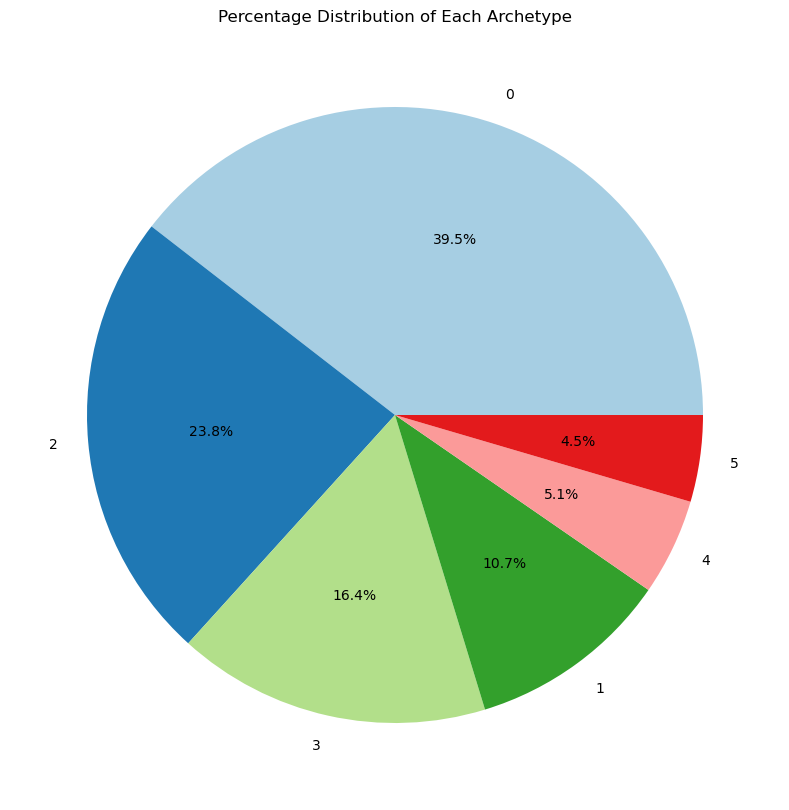

Percentage Distribution of Each Archetype:
------------------------------------------
0    39.510490
2    23.776224
3    16.433566
1    10.664336
4     5.069930
5     4.545455
Name: Archetype, dtype: float64


In [17]:
# Calculate the percentage of each archetype
archetype_counts = aggregated_df['Archetype'].value_counts(normalize=True) * 100

# Plot the pie chart
plt.figure(figsize=(15, 10))
plt.pie(archetype_counts, labels=archetype_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Percentage Distribution of Each Archetype')
plt.show()

# Display the percentage distribution of each archetype
print('Percentage Distribution of Each Archetype:')
print('------------------------------------------')
print(archetype_counts)

The percentage distribution of each archetype reveals how the players are grouped within the dataset. Archetype 0 represents the largest proportion, comprising 39.51% of the players, indicating it is the most common playing style among the group. Archetype 2 follows with 23.78%, while archetype 3 accounts for 16.43%. Archetypes 1, 4, and 5 make up smaller portions of the dataset, with 10.66%, 5.07%, and 4.55% of the total players, respectively. This distribution highlights the relative prevalence of different playing styles in the dataset, with certain archetypes being more dominant than others.

### Observing average stats of archetypes

In this section of the analysis, we aim to examine the average statistics for each NBA player archetype identified through clustering. By grouping the data by the 'Archetype' column, we calculate the mean for various key performance metrics, such as points, assists, rebounds, shooting percentages, and other relevant statistics. The goal is to better understand how each archetype performs across different features. To visualize these differences, we create a series of bar plots that show the mean values for each feature, helping to highlight the distinctive characteristics of each archetype. This visualization provides an effective way to compare and contrast the various player roles and their contributions on the court.

,Total MP,Total 3P,Total 3PA,Total 2P,Total 2PA,Total FT,Total FTA,Total ORB,Total DRB,Total AST,Total STL,Total BLK,Total TOV,Total PF,Total PTS
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Archetype,,,,,,,,,,,,,,,
0,216.259735,8.830088,27.414602,18.755310,35.673894,9.332301,13.085841,11.546018,27.895575,18.069469,6.297345,4.388938,9.732301,19.949558,73.216814
1,2389.454098,174.380328,463.377049,311.104918,597.345902,209.847541,251.519672,63.037705,285.050820,321.947541,72.298361,38.939344,148.677049,159.062295,1356.032787
2,1065.945588,49.591176,137.987500,95.257353,174.958824,50.447059,67.689706,52.675735,136.164706,93.019118,36.366912,23.992647,45.733824,93.421324,389.830882
3,1921.815957,109.040426,296.586170,190.748936,356.503191,97.600000,124.548936,70.510638,233.270213,198.300000,60.224468,31.655319,92.491489,143.552128,807.288298
4,2143.327586,39.362069,117.593103,378.951724,629.775862,172.941379,237.600000,207.944828,472.824138,162.186207,57.200000,111.017241,116.368966,195.327586,1048.217241
5,3260.903846,174.200000,475.834615,553.169231,1005.215385,384.596154,484.365385,107.711538,473.765385,525.369231,99.484615,48.688462,221.303846,226.034615,2012.311538


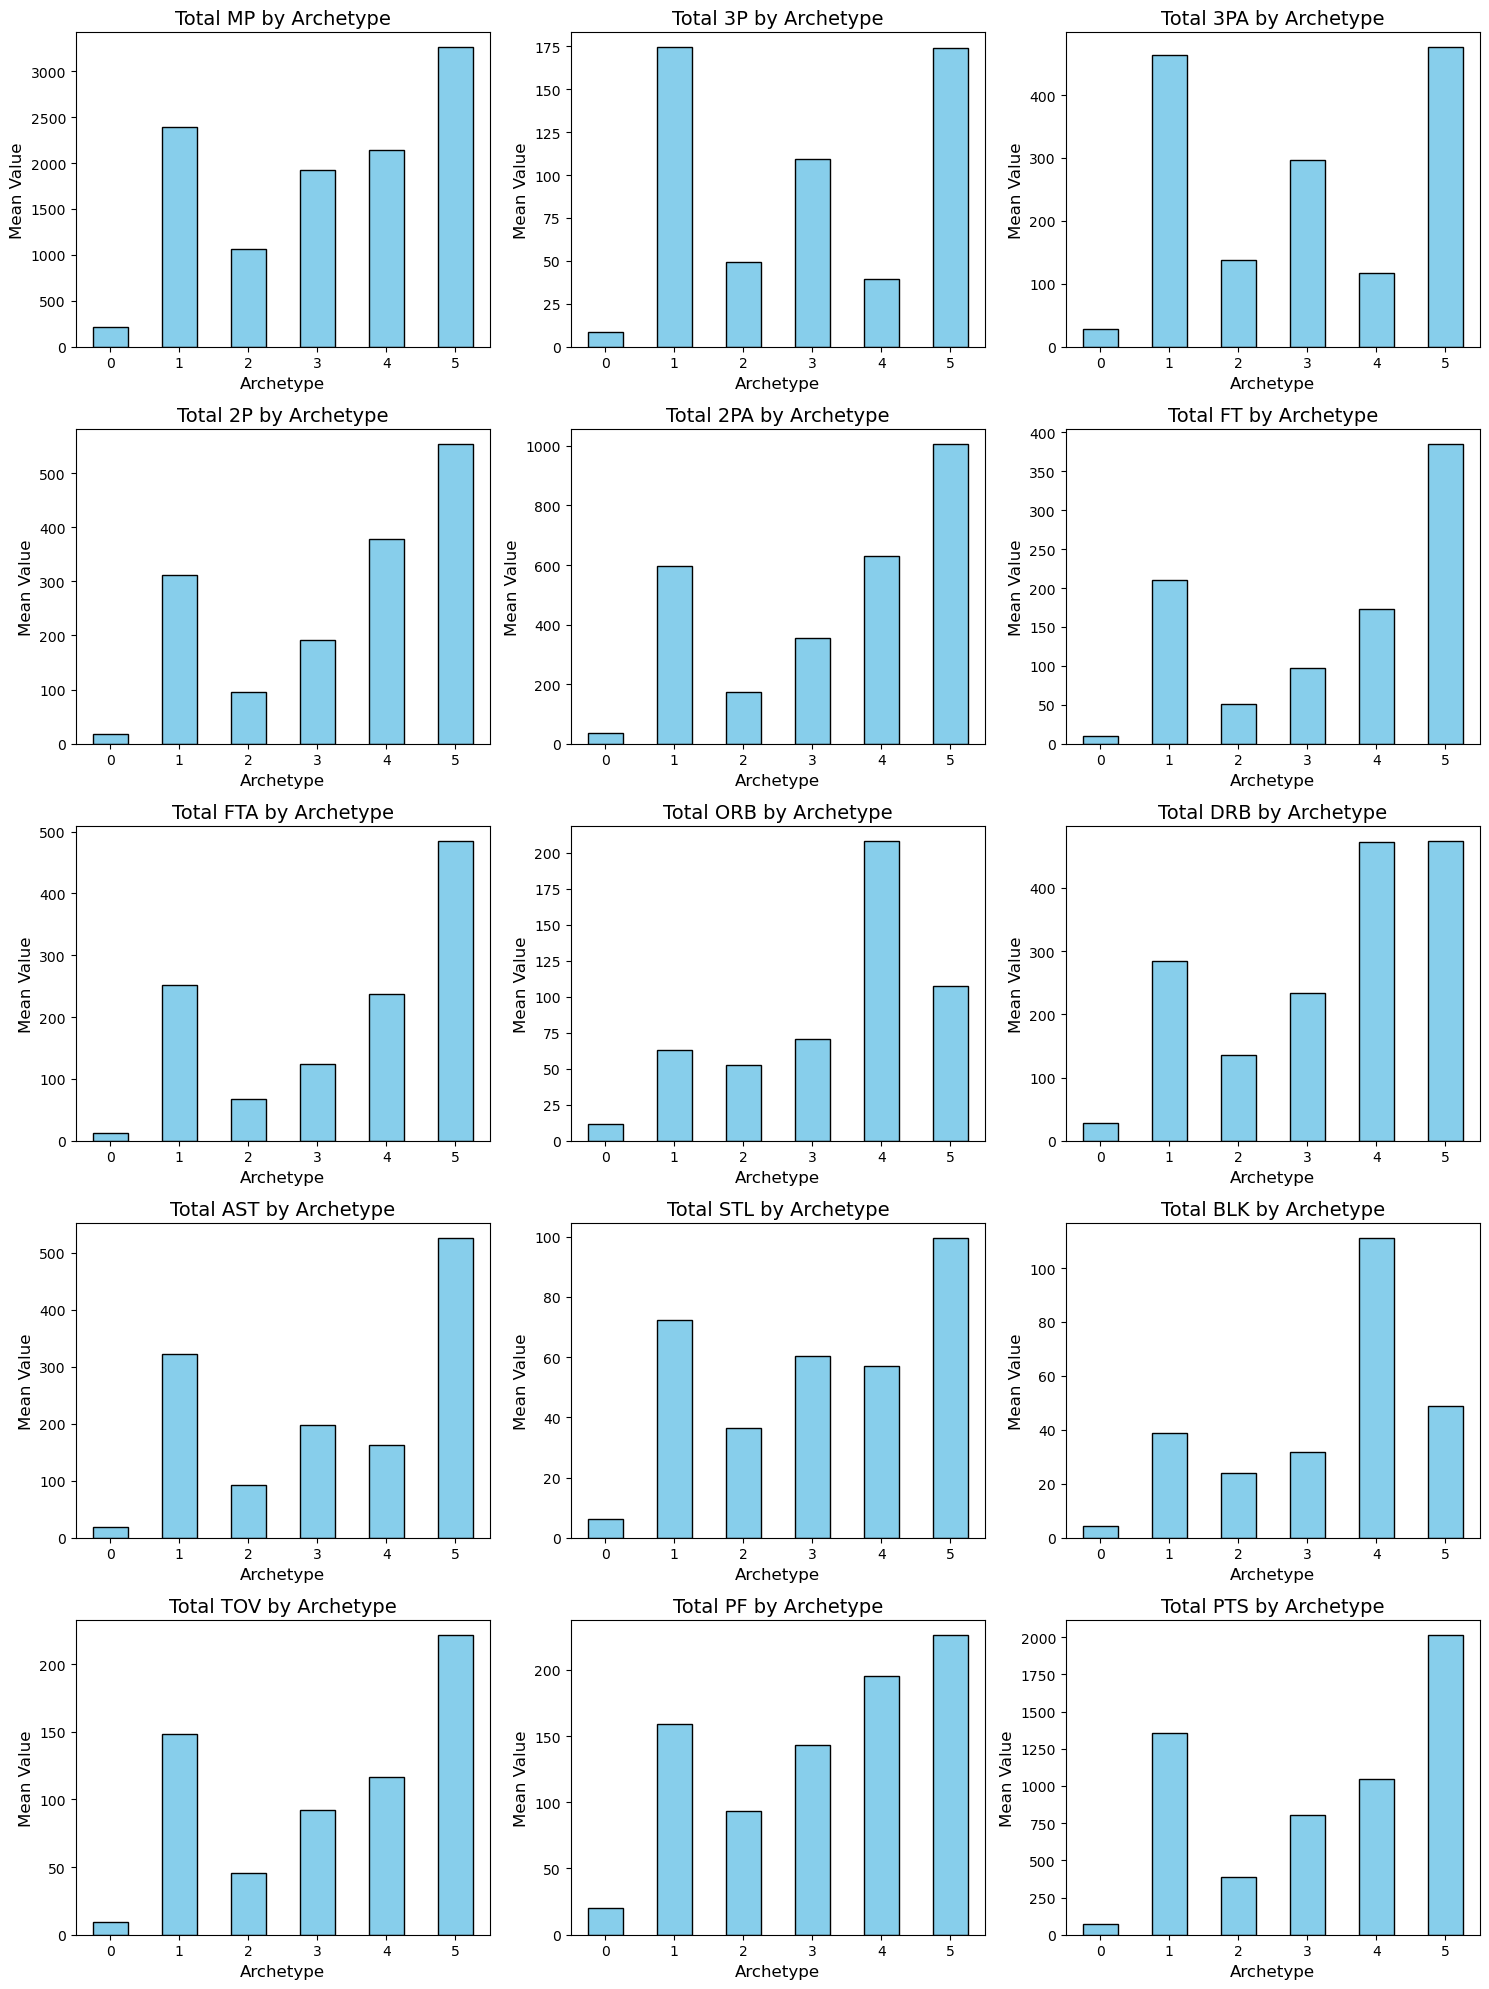

In [18]:
# Grouping by 'Archetype' and calculating the mean for each feature
cluster_stats = aggregated_df.groupby('Archetype').agg({
    'Total MP': ['mean'],
    'Total 3P': ['mean'],
    'Total 3PA': ['mean'],
    'Total 2P': ['mean'],
    'Total 2PA': ['mean'],
    'Total FT': ['mean'],
    'Total FTA': ['mean'],
    'Total ORB': ['mean'],
    'Total DRB': ['mean'],
    'Total AST': ['mean'],
    'Total STL': ['mean'],
    'Total BLK': ['mean'],
    'Total TOV': ['mean'],
    'Total PF': ['mean'],
    'Total PTS': ['mean'],
})
display(cluster_stats)
	
# Flatten the multi-level column names for easier access
cluster_stats.columns = ['_'.join(col).strip() for col in cluster_stats.columns.values]

# List of features to plot
features = ['Total MP', 'Total 3P', 'Total 3PA', 'Total 2P', 'Total 2PA', 
            'Total FT', 'Total FTA', 'Total ORB', 'Total DRB', 'Total AST', 
            'Total STL', 'Total BLK', 'Total TOV', 'Total PF', 'Total PTS']

# Set up the figure for the bar plots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))
axes = axes.flatten()

# Loop over the features and plot the bar chart for each
for i, feature in enumerate(features):
    # Plot the mean for each cluster
    cluster_stats[f'{feature}_mean'].plot(kind='bar', ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(f'{feature} by Archetype', fontsize=14)
    axes[i].set_xlabel('Archetype', fontsize=12)
    axes[i].set_ylabel('Mean Value', fontsize=12)
    axes[i].set_xticklabels(cluster_stats.index, rotation=0)

plt.tight_layout()
plt.show()


### Exporting Archetypes

We will now categorize players by their archetype and assign them to individual dataframes. These dataframes will be exported as CSV files for further analysis in a separate Jupyter notebook.

In [19]:
cluster_0 = aggregated_df[aggregated_df['Archetype'] == '0']
cluster_0.to_csv('cluster_0.csv', index=False)

display(cluster_0)

,Player Name,Archetype,Total MP,Total 3P,Total 3PA,Total 2P,Total 2PA,Total FT,Total FTA,Total ORB,Total DRB,Total AST,Total STL,Total BLK,Total TOV,Total PF,Total PTS
0,A.J. Green,0,616.0,67.2,168.0,16.8,28.0,16.8,16.8,11.2,56.0,28.0,11.2,5.6,11.2,50.4,252.0
1,A.J. Lawson,0,310.8,12.6,50.4,42.0,71.4,16.8,21.0,12.6,37.8,21.0,8.4,4.2,12.6,21.0,134.4
2,AJ Griffin,0,172.0,10.0,40.0,8.0,24.0,2.0,2.0,2.0,16.0,6.0,2.0,2.0,8.0,6.0,48.0
7,Adam Flagler,0,14.0,1.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,3.0
8,Adama Sanogo,0,65.7,0.0,0.0,14.4,27.0,8.1,11.7,18.9,17.1,0.0,0.9,0.0,5.4,5.4,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,Wendell Moore Jr.,0,75.0,0.0,5.0,10.0,12.5,0.0,0.0,0.0,12.5,5.0,5.0,0.0,5.0,5.0,17.5
561,Wenyen Gabriel,0,81.0,1.0,6.0,7.0,16.0,0.0,5.0,7.0,18.0,3.0,2.0,2.0,8.0,10.0,17.0
562,Wesley Matthews,0,414.0,25.2,68.4,10.8,28.8,18.0,25.2,10.8,43.2,21.6,14.4,10.8,7.2,43.2,111.6
563,Xavier Moon,0,119.0,1.4,16.8,12.6,29.4,1.4,1.4,8.4,9.8,21.0,2.8,2.8,5.6,8.4,33.6


In [20]:
cluster_1 = aggregated_df[aggregated_df['Archetype'] == '1']
cluster_1.to_csv('cluster_1.csv', index=False)

display(cluster_1)

,Player Name,Archetype,Total MP,Total 3P,Total 3PA,Total 2P,Total 2PA,Total FT,Total FTA,Total ORB,Total DRB,Total AST,Total STL,Total BLK,Total TOV,Total PF,Total PTS
11,Alec Burks,1,2427.9,249.6,657.9,171.3,477.2,288.6,330.5,50.5,252.2,175.3,54.8,26.1,92.4,148.6,1377.7
34,Austin Reaves,1,2632.2,155.8,418.2,303.4,516.6,229.6,270.6,57.4,295.2,451.0,65.6,24.6,172.2,155.8,1303.8
45,Bogdan Bogdanovi?,1,2401.6,237.0,639.9,229.1,458.2,150.1,165.9,55.3,221.2,244.9,94.8,23.7,110.6,181.7,1335.1
46,Bojan Bogdanovi?,1,2954.3,264.3,671.1,352.5,693.7,235.7,298.2,45.5,261.6,193.0,56.7,8.5,204.7,190.6,1733.6
53,Brandon Ingram,1,2105.6,83.2,243.2,416.0,774.4,243.2,307.2,44.8,281.6,364.8,51.2,38.4,160.0,147.2,1331.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,Stephen Curry,1,2419.8,355.2,873.2,296.0,569.8,296.0,325.6,37.0,296.0,377.4,51.8,29.6,207.2,118.4,1953.6
529,Tobias Harris,1,2366.0,91.0,259.0,371.0,693.0,189.0,210.0,77.0,371.0,217.0,70.0,49.0,91.0,112.0,1204.0
533,Trae Young,1,1944.0,172.8,469.8,259.2,540.0,345.6,405.0,21.6,124.2,583.2,70.2,10.8,237.6,108.0,1387.8
549,Tyrese Haliburton,1,2221.8,193.2,538.2,303.6,510.6,193.2,227.7,34.5,234.6,752.1,82.8,48.3,158.7,75.9,1386.9


In [21]:
cluster_2 = aggregated_df[aggregated_df['Archetype'] == '2']
cluster_2.to_csv('cluster_2.csv', index=False)

display(cluster_2)

,Player Name,Archetype,Total MP,Total 3P,Total 3PA,Total 2P,Total 2PA,Total FT,Total FTA,Total ORB,Total DRB,Total AST,Total STL,Total BLK,Total TOV,Total PF,Total PTS
4,Aaron Holiday,2,1271.4,85.8,218.4,101.4,202.8,54.6,62.4,23.4,101.4,140.4,39.0,7.8,54.6,124.8,514.8
6,Aaron Wiggins,2,1224.6,62.4,124.8,148.2,249.6,54.6,70.2,62.4,124.8,85.8,54.6,15.6,54.6,93.6,538.2
12,Aleksej Pokusevski,2,811.6,35.0,110.2,61.6,133.4,61.6,83.8,33.2,145.6,72.0,29.4,27.6,38.8,43.6,290.8
20,Amir Coffey,2,1463.0,70.0,182.0,98.0,168.0,63.0,70.0,28.0,119.0,77.0,42.0,14.0,35.0,105.0,462.0
27,Anthony Black,2,1166.1,34.5,96.6,75.9,151.8,48.3,82.8,34.5,103.5,89.7,34.5,20.7,55.2,110.4,317.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,Wendell Carter Jr.,2,1408.0,66.0,170.5,159.5,253.0,93.5,132.0,110.0,269.5,93.5,33.0,27.5,66.0,121.0,605.0
565,Yuta Watanabe,2,927.2,48.0,170.4,33.6,62.8,18.9,33.5,21.8,88.0,27.3,25.3,12.6,40.8,77.2,233.0
567,Zach LaVine,2,872.5,60.0,170.0,110.0,207.5,87.5,102.5,7.5,120.0,97.5,20.0,7.5,52.5,57.5,487.5
569,Zeke Nnaji,2,574.2,5.8,23.2,63.8,127.6,40.6,63.8,63.8,63.8,34.8,17.4,40.6,29.0,81.2,185.6


In [22]:
cluster_3 = aggregated_df[aggregated_df['Archetype'] == '3']
cluster_3.to_csv('cluster_3.csv', index=False)

display(cluster_3)

,Player Name,Archetype,Total MP,Total 3P,Total 3PA,Total 2P,Total 2PA,Total FT,Total FTA,Total ORB,Total DRB,Total AST,Total STL,Total BLK,Total TOV,Total PF,Total PTS
5,Aaron Nesmith,3,1994.4,136.8,331.2,172.8,302.4,108.0,136.8,64.8,208.8,108.0,64.8,50.4,64.8,237.6,878.4
10,Al Horford,3,1742.0,110.5,260.0,104.0,162.5,26.0,32.5,84.5,331.5,169.0,39.0,65.0,45.5,91.0,559.0
13,Alex Caruso,3,2037.7,134.9,333.7,113.6,205.9,71.0,99.4,63.9,213.0,248.5,120.7,71.0,99.4,177.5,717.1
19,Amen Thompson,3,1388.8,6.2,55.8,229.4,390.6,105.4,155.0,148.8,260.4,161.2,80.6,37.2,93.0,142.6,589.0
24,Andrew Nembhard,3,1700.0,61.2,170.0,197.2,353.6,47.6,54.4,34.0,102.0,278.8,61.2,6.8,102.0,142.8,625.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,Tyus Jones,3,1933.8,105.6,257.4,217.8,409.2,33.0,39.6,19.8,158.4,481.8,72.6,19.8,66.0,46.2,792.0
554,Vasilije Mici?,3,2352.0,87.0,309.0,231.0,432.0,123.0,153.0,24.0,147.0,525.0,60.0,12.0,201.0,132.0,843.0
556,Vince Williams Jr.,3,1435.2,78.0,208.0,88.4,171.6,104.0,130.0,57.2,228.8,176.8,46.8,36.4,93.6,135.2,520.0
564,Xavier Tillman Sr.,3,1946.4,43.2,163.4,203.4,397.6,42.6,100.8,138.6,282.4,153.4,99.4,87.2,69.0,152.8,570.2


In [23]:
cluster_4 = aggregated_df[aggregated_df['Archetype'] == '4']
cluster_4.to_csv('cluster_4.csv', index=False)

display(cluster_4)

,Player Name,Archetype,Total MP,Total 3P,Total 3PA,Total 2P,Total 2PA,Total FT,Total FTA,Total ORB,Total DRB,Total AST,Total STL,Total BLK,Total TOV,Total PF,Total PTS
3,Aaron Gordon,4,2299.5,36.5,138.7,357.7,576.7,175.2,270.1,175.2,299.3,255.5,58.4,43.8,102.2,138.7,1014.7
17,Alperen Sengun,4,2047.5,31.5,113.4,491.4,869.4,245.7,352.8,182.7,403.2,315.0,75.6,44.1,163.8,207.9,1329.3
21,Andre Drummond,4,1350.9,0.0,0.0,268.6,474.0,126.4,221.2,268.6,442.4,39.5,71.1,47.4,79.0,142.2,663.6
28,Anthony Davis,4,2698.0,30.4,106.4,684.0,1178.0,418.0,516.8,235.6,722.0,266.0,91.2,174.8,159.6,174.8,1877.2
36,Bam Adebayo,4,2414.0,14.2,42.6,518.3,972.7,291.1,390.5,156.2,575.1,276.9,78.1,63.9,163.3,156.2,1370.3
58,Brook Lopez,4,2409.5,150.1,402.9,221.2,347.6,110.6,134.3,118.5,292.3,126.4,39.5,189.6,79.0,189.6,987.5
78,Chet Holmgren,4,2410.8,131.2,352.6,377.2,606.8,221.4,278.8,131.2,516.6,196.8,49.2,188.6,131.2,196.8,1353.0
87,Clint Capela,4,1883.4,0.0,0.0,350.4,620.5,131.4,204.4,335.8,438.0,87.6,43.8,109.5,73.0,160.6,839.5
111,Daniel Gafford,4,3629.0,0.0,0.0,695.3,959.1,238.7,349.7,386.7,735.8,232.3,131.9,309.5,148.0,459.1,1629.3
112,Daniel Theis,4,2030.9,47.6,143.8,262.8,443.3,71.4,95.2,166.6,321.3,119.0,47.6,107.1,83.3,250.9,751.7


In [24]:
cluster_5 = aggregated_df[aggregated_df['Archetype'] == '5']
cluster_5.to_csv('cluster_5.csv', index=False)

display(cluster_5)

,Player Name,Archetype,Total MP,Total 3P,Total 3PA,Total 2P,Total 2PA,Total FT,Total FTA,Total ORB,Total DRB,Total AST,Total STL,Total BLK,Total TOV,Total PF,Total PTS
29,Anthony Edwards,5,2772.9,189.6,529.3,529.3,1027.0,426.6,505.6,55.3,379.2,402.9,102.7,39.5,244.9,142.2,2046.1
59,Bruce Brown,5,3733.4,107.0,327.7,452.1,833.9,230.9,284.4,107.2,458.5,385.1,120.4,36.9,170.9,297.9,1449.3
110,Damian Lillard,5,2576.9,219.0,620.5,321.2,657.0,474.5,511.0,36.5,284.7,511.0,73.0,14.6,189.8,131.4,1773.9
125,De'Aaron Fox,5,2656.6,214.6,577.2,503.2,969.4,310.8,421.8,66.6,273.8,414.4,148.0,29.6,192.4,192.4,1968.4
130,DeMar DeRozan,5,2986.2,71.1,221.2,576.7,1129.7,521.4,608.3,39.5,300.2,418.7,86.9,47.4,134.3,158.0,1896.0
136,Dennis SchrÃ¶der,5,4976.6,273.4,735.2,528.0,1117.0,355.7,427.7,77.8,401.4,973.1,127.3,34.9,303.2,333.1,2242.1
144,Devin Booker,5,2448.0,149.6,414.8,489.6,884.0,408.0,455.6,54.4,251.6,469.2,61.2,27.2,176.8,204.0,1842.8
150,Domantas Sabonis,5,2927.4,32.8,90.2,598.6,984.0,295.2,418.2,295.2,828.2,672.4,73.8,49.2,270.6,246.0,1590.8
184,Giannis Antetokounmpo,5,2569.6,36.5,124.1,803.0,1248.3,511.0,781.1,197.1,642.4,474.5,87.6,80.3,248.2,211.7,2219.2
188,Grant Williams,5,4256.2,255.5,670.6,302.3,536.5,212.5,277.3,171.2,468.0,347.5,89.4,77.8,213.2,454.2,1566.6
